## Q1: The stock market

(This is about numba)

A Markov Chain is defined as a sequence of random variables where a parameter depends *only* on the preceding value. This is a crucial tool in statistics, widely used in science and beyond (economics for instance).

For instance, the stock market has phases of growing prices (bull), dreasing prices (bear) and recession. This would be a Markov Chain model:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/9/95/Finance_Markov_chain_example_state_space.svg/400px-Finance_Markov_chain_example_state_space.svg.png)

where the numbers on the arrows indicate the probabily that the next day will be in a given state.

Your task is to simulate the stock market according to this rule. Start from a random state and simulate many many  iterations. If your code is right, the fraction of days in each state should converge. 

Implement a pure-python version and a numba version, and compare speeds. 


### Simple python version

The loop required: 4.432965278625488 seconds

Bear market converge to: 0.1131726451784063
Stag market converge to: 0.4948048276166196
Bull market converge to: 0.3920225272049742


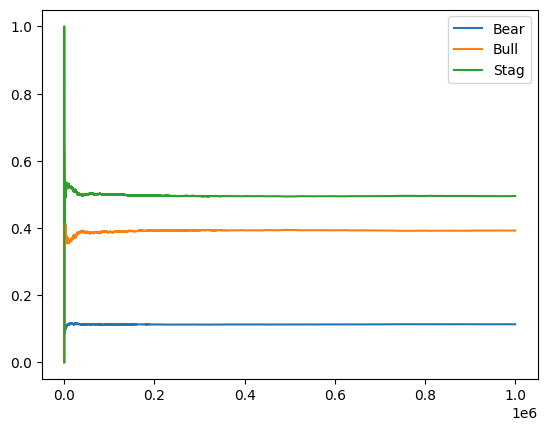

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import time

def cicle(iternum,values):
    BullCount=BearCount=StagCount=0
    state = round(np.random.uniform(0,2),0) #state variable represents the current state 0=stag, 1=bear, 2=bull   
    
    for l in range(1,iternum):
        x=np.random.uniform()
        match state: #based on the current state, i switch to different cases
            case 0:
                if x<=0.25:      #move forward to Bull
                    state +=1
                    BullCount +=1
                
                elif x<0.5:    #move back to Bear
                    state +=2
                    BearCount+=1
                
                else:             #stay here
                    StagCount+=1
        
            case 1:
                if x<=0.075:     #move forward to Bear
                    state +=1
                    BearCount +=1
                elif x<0.1:     #move back to Stagnant
                    state -=1
                    StagCount+=1
                else:             #stay here
                    BullCount+=1
            
            case 2:
                if x<=0.05:      #move forward to Stagnant
                    state -=2
                    StagCount +=1
                elif x<0.15:    #move back to Bear
                    state -=2
                    BearCount+=1
                else:             #stay here
                    StagCount+=1                    
        values[0,l]=StagCount/l
        values[2,l]=BullCount/l
        values[1,l]=BearCount/l


iternum=1000000
values = np.zeros((3,iternum)) #0=stag, 1=bear, 2=bull        
        
start_time = time.time()    
cicle(iternum,values)
print("The loop required: %s seconds" % (time.time() - start_time)) #print the time required

plt.plot(values[1,:],label='Bear')   
plt.plot(values[2,:], label='Bull') 
plt.plot(values[0,:], label='Stag') 
plt.legend()

print('\nBear market converge to: '+str(np.mean(values[1,iternum-100:iternum]))) #print the convergence values as the mean of the last 100 elements
print('Stag market converge to: '+str(np.mean(values[0,iternum-100:iternum])))
print('Bull market converge to: '+str(np.mean(values[2,iternum-100:iternum])))

### njit version

The loop required: 0.5658979415893555 seconds

Bear market converge to: 0.11317863552190977
Stag market converge to: 0.49709933342990875
Bull market converge to: 0.3897220310481815


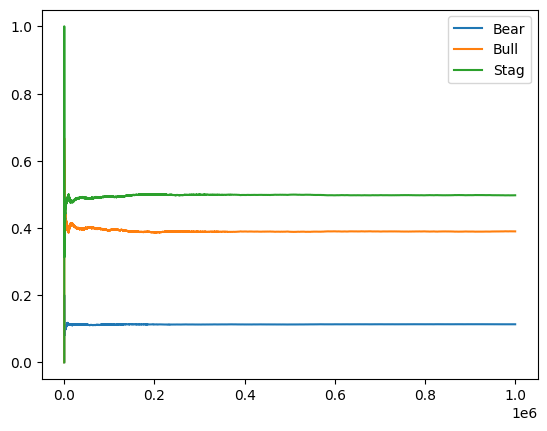

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from numba import njit
import time

@njit
def fast_cicle(iternum,values):
    BullCount=BearCount=StagCount=0
    state = round(np.random.uniform(0,2),0) #state variable represents the current state 0=stag, 1=bear, 2=bull
    
    for l in range(1,iternum):
        x=np.random.uniform()
        match state:   #based on the current state, i switch to different cases
            case 0:
                if x<=0.25:      #move forward to Bull
                    state +=1
                    BullCount +=1
                
                elif x<0.5:    #move back to Bear
                    state +=2
                    BearCount+=1
                
                else:             #stay here
                    StagCount+=1
        
            case 1:
                if x<=0.075:     #move forward to Bear
                    state +=1
                    BearCount +=1
                elif x<0.1:     #move back to Stagnant
                    state -=1
                    StagCount+=1
                else:             #stay here
                    BullCount+=1
            
            case 2:
                if x<=0.05:      #move forward to Stagnant
                    state -=2
                    StagCount +=1
                elif x<0.15:    #move back to Bear
                    state -=2
                    BearCount+=1
                else:             #stay here
                    StagCount+=1                    
        values[0,l]=StagCount/l
        values[2,l]=BullCount/l
        values[1,l]=BearCount/l

iternum=1000000
values = np.zeros((3,iternum)) #0=stag, 1=bear, 2=bull        
        
start_time = time.time() 
fast_cicle(iternum,values)
print("The loop required: %s seconds" % (time.time() - start_time)) #print the time required

plt.plot(values[1,:],label='Bear')   
plt.plot(values[2,:], label='Bull') 
plt.plot(values[0,:], label='Stag') 
plt.legend()
print('\nBear market converge to: '+str(np.mean(values[1,iternum-100:iternum]))) #print the convergence values as the mean of the last 100 elements
print('Stag market converge to: '+str(np.mean(values[0,iternum-100:iternum])))
print('Bull market converge to: '+str(np.mean(values[2,iternum-100:iternum])))

## Q2: Consistent plotting

Write a decorator for the plots of all your papers. 

-set PDF as the default file format for saving

-set ticks to be inwards

-set font and size

NOTE: The wrapper plots the data from the previous exercise. Iternum is repeated although it is already defined from before. X si defined for generalizability to cases where x is given with dx!=1 (here yplot would be enough).

Text(38.83333333333333, 0.5, '% of days ')

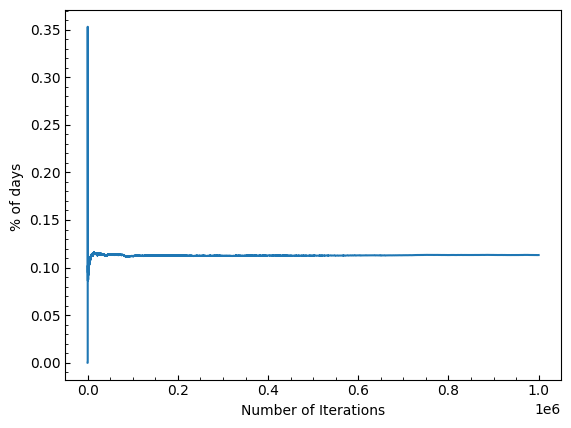

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

def myplot(func,*args):
    def wrapper(*args):
        mpl.rcParams['xtick.labelsize']=10
        mpl.rcParams['ytick.labelsize']=10
        mpl.rcParams['font.family'] = 'sans-serif'
        mpl.rcParams['font.sans-serif'] = ['DejaVu Sans']
        mpl.rcParams['savefig.format'] = 'pdf'
        mpl.rcParams['savefig.dpi'] = 300
        mpl.rcParams['xtick.direction'] = 'in'
        mpl.rcParams['ytick.direction'] = 'in'
        mpl.rcParams['xtick.minor.visible'] = True
        mpl.rcParams['ytick.minor.visible'] = True
        func(*args)
    return wrapper

@myplot
def xyplot(x,y,name):
    #Plot an array given x and y
    plt.plot(x,y)
    plt.savefig(name)
    
@myplot    
def yplot(y,name):
    #Plot an array given y (default dx=1)
    plt.plot(y)
    plt.savefig(name)
    

iternum=1000000
x=np.arange(0,iternum,1) 
xyplot(x,values[1,:],'Bear_Market_Convergence')
plt.xlabel('Number of Iterations') 
plt.ylabel('% of days ')